# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [13]:
# Instalação de bibliotecas básicas
!pip install pandas matplotlib seaborn numpy
!pip install pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import pandas as pd

# URL do arquivo CSV no GitHub
url = 'https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv'

# Carregar o arquivo CSV usando o pandas
df = pd.read_csv(url)

# Exibir as primeiras linhas do DataFrame para confirmar que o carregamento foi bem-sucedido
print(df.head())


   Unnamed: 0        date   time            comp        round  day venue  \
0           1  2021-08-15  16:30  Premier League  Matchweek 1  Sun  Away   
1           2  2021-08-21  15:00  Premier League  Matchweek 2  Sat  Home   
2           3  2021-08-28  12:30  Premier League  Matchweek 3  Sat  Home   
3           4  2021-09-11  15:00  Premier League  Matchweek 4  Sat  Away   
4           6  2021-09-18  15:00  Premier League  Matchweek 5  Sat  Home   

  result   gf   ga  ...  match report  notes    sh   sot  dist   fk   pk  \
0      L  0.0  1.0  ...  Match Report    NaN  18.0   4.0  16.9  1.0  0.0   
1      W  5.0  0.0  ...  Match Report    NaN  16.0   4.0  17.3  1.0  0.0   
2      W  5.0  0.0  ...  Match Report    NaN  25.0  10.0  14.3  0.0  0.0   
3      W  1.0  0.0  ...  Match Report    NaN  25.0   8.0  14.0  0.0  0.0   
4      D  0.0  0.0  ...  Match Report    NaN  16.0   1.0  15.7  1.0  0.0   

  pkatt season             team  
0   0.0   2022  Manchester City  
1   0.0   2022  Ma

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [15]:
# Responda aqui a primeira etapa
print("Shape:", df.shape)
print("Tipos de dados:\n", df.dtypes)
print("Valores ausentes:\n", df.isnull().sum())
print("Estatísticas descritivas:\n", df.describe())


Shape: (1389, 28)
Tipos de dados:
 Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object
Valores ausentes:
 Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga     

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

In [35]:
# Responda aqui a etapa
# Remover linhas com valores ausentes na coluna de público
df = df.dropna(subset=['attendance'])

# Calcular o público total por equipe
team_attendance = df.groupby('team')['attendance'].sum().reset_index()
team_attendance = team_attendance.sort_values(by='attendance', ascending=False)

# Gráfico de linha do público total por equipe
fig_total = px.line(
    team_attendance,
    x='team',
    y='attendance',
    title='Público Total por Equipe (Escala)',
    labels={'attendance': 'Público Total', 'team': 'Equipe'},
    markers=True
)

# Exibir o gráfico de público total por equipe
fig_total.show()

# Gráfico detalhado por jogos de cada equipe
fig_detail = go.Figure()

# Adicionar um traço de linha para cada equipe
for team_name in team_attendance['team']:
    team_games = df[df['team'] == team_name]
    fig_detail.add_trace(go.Scatter(
        x=team_games['date'],
        y=team_games['attendance'],
        mode='lines+markers',
        name=team_name,
        text=team_games['opponent'],
        hovertemplate='<b>%{text}</b><br>Data: %{x}<br>Público: %{y}<extra></extra>',
    ))

# Configurar layout do gráfico detalhado
fig_detail.update_layout(
    title='Detalhamento do Público por Jogo de Cada Equipe (Escala)',
    xaxis_title='Data do Jogo',
    yaxis_title='Público',
    template='plotly_white'
)

# Exibir o gráfico detalhado
fig_detail.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

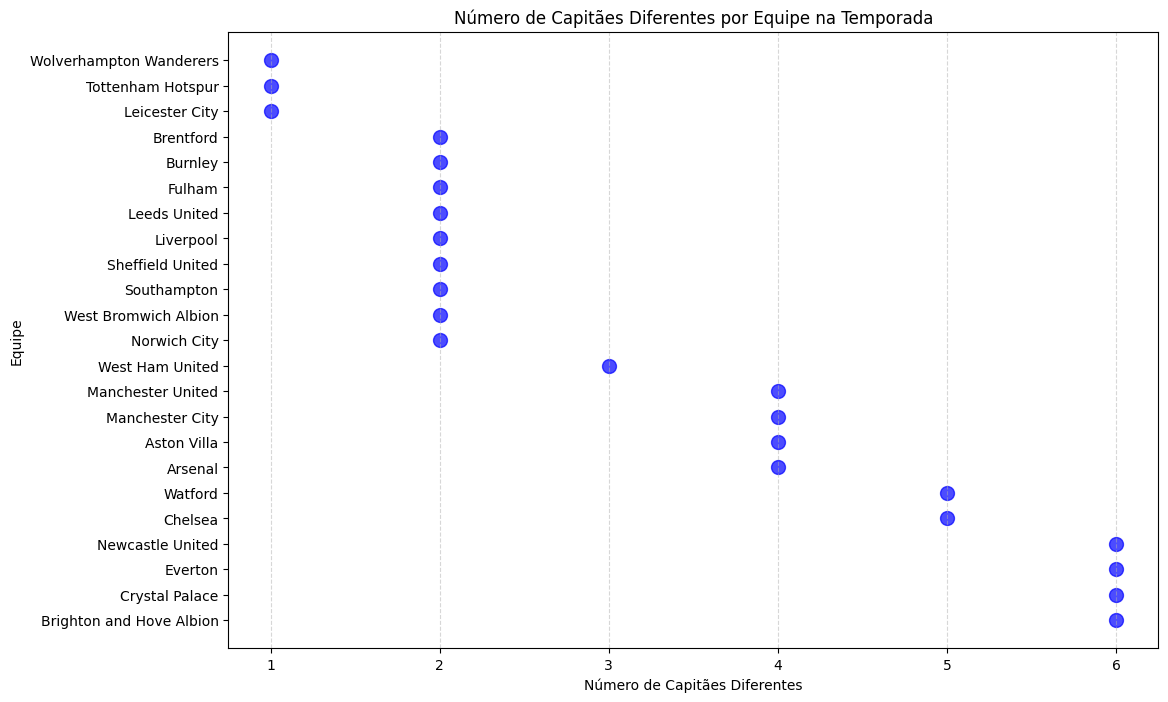

In [36]:
# Responda a etapa aqui

# Contar o número de capitães únicos por equipe
captains_per_team = df.groupby('team')['captain'].nunique().reset_index()

# Renomear as colunas para clareza
captains_per_team.columns = ['team', 'unique_captains']

# Ordenar os resultados para melhor visualização
captains_per_team = captains_per_team.sort_values(by='unique_captains', ascending=False)

# Criar o gráfico de pontos
plt.figure(figsize=(12, 8))
plt.scatter(captains_per_team['unique_captains'], captains_per_team['team'], color='blue', s=100, alpha=0.7)
plt.title('Número de Capitães Diferentes por Equipe na Temporada')
plt.xlabel('Número de Capitães Diferentes')
plt.ylabel('Equipe')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

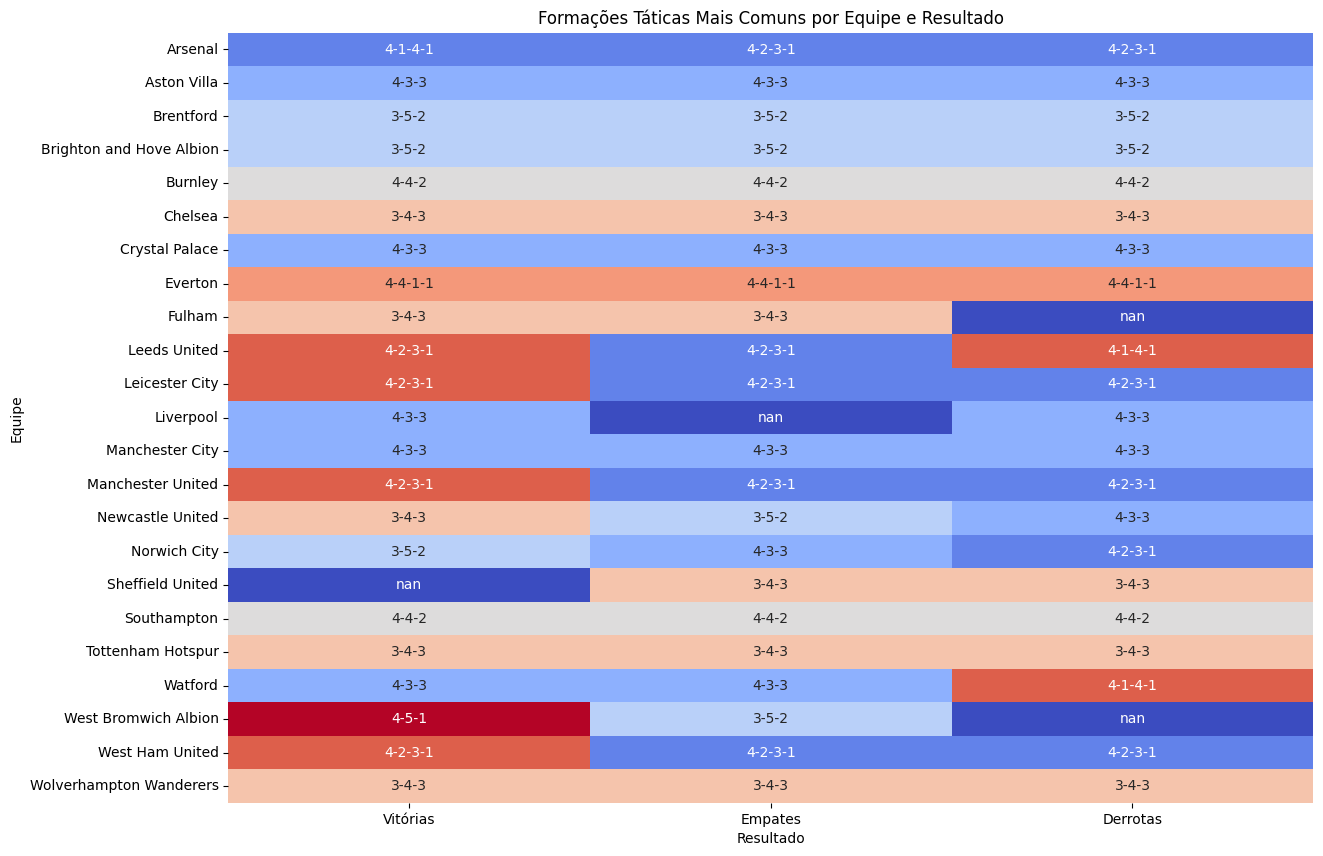

In [37]:
# Responda a etapa aqui

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar dados para vitórias, empates e derrotas
results = ['W', 'D', 'L']
formation_data = []

# Iterar sobre cada equipe e resultado para encontrar a formação mais comum
for result in results:
    common_formation = df[df['result'] == result].groupby(['team', 'formation']).size().reset_index(name='count')
    common_formation = common_formation.sort_values(['team', 'count'], ascending=[True, False]).drop_duplicates(['team'])
    common_formation['result'] = result
    formation_data.append(common_formation)

# Concatenar os dados das formações mais comuns
formation_data = pd.concat(formation_data)

# Pivotar os dados para facilitar o gráfico
formation_pivot = formation_data.pivot(index='team', columns='result', values='formation')

# Configurar o heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(formation_pivot.apply(lambda x: pd.factorize(x)[0]), annot=formation_pivot, fmt='', cmap='coolwarm', cbar=False)
plt.title('Formações Táticas Mais Comuns por Equipe e Resultado')
plt.xlabel('Resultado')
plt.ylabel('Equipe')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Vitórias', 'Empates', 'Derrotas'])
plt.show()

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

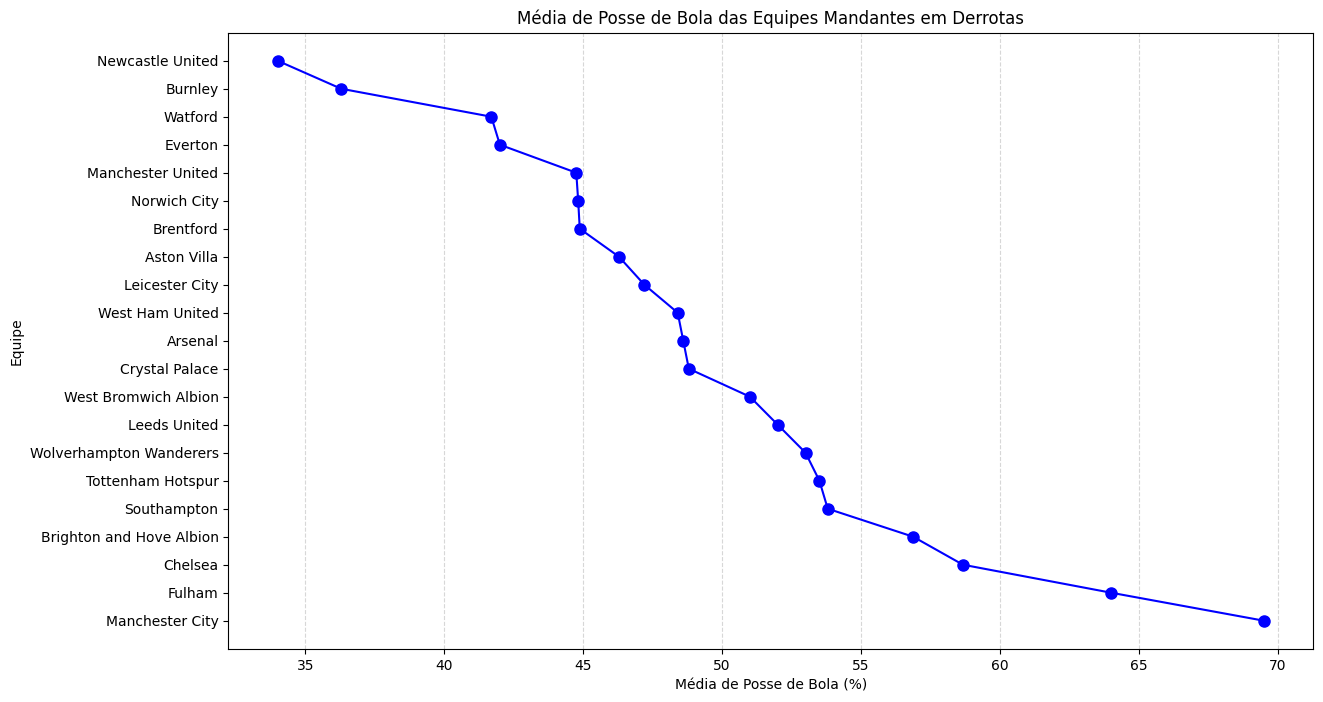

In [39]:
# Responda aqui a etapa

# Filtrar os dados para jogos onde a equipe era mandante e perdeu
home_loss = df[(df['venue'] == 'Home') & (df['result'] == 'L')]

# Calcular a média de posse de bola para cada equipe mandante que perdeu
possession_avg = home_loss.groupby('team')['poss'].mean().reset_index()

# Ordenar os dados para facilitar a visualização
possession_avg = possession_avg.sort_values(by='poss', ascending=False)

# Criar o gráfico de linha com pontos
plt.figure(figsize=(14, 8))
plt.plot(possession_avg['poss'], possession_avg['team'], marker='o', linestyle='-', color='b', markersize=8)
plt.title('Média de Posse de Bola das Equipes Mandantes em Derrotas')
plt.xlabel('Média de Posse de Bola (%)')
plt.ylabel('Equipe')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [60]:
import pandas as pd
from IPython.display import display, HTML

# Calcular pontos das equipes
df['points'] = df['result'].apply(lambda x: 3 if x == 'W' else 1 if x == 'D' else 0)

# Agrupar por equipe e calcular o total de pontos
team_points = df.groupby('team')['points'].sum().reset_index()

# Ordenar por pontos, do maior para o menor
team_points = team_points.sort_values(by='points', ascending=False).reset_index(drop=True)
team_points['position'] = team_points.index + 1  # Adicionar a posição do time

# Dicionário atualizado de URLs dos logos das equipes
logo_urls = {
    "Arsenal": "https://upload.wikimedia.org/wikipedia/en/5/53/Arsenal_FC.svg",
    "Aston Villa": "https://www.justwatch.com/images/icon/318618533/s166/aston-villa-fc.png",
    "Brentford": "https://upload.wikimedia.org/wikipedia/en/2/2a/Brentford_FC_crest.svg",
    "Brighton and Hove Albion": "https://th.bing.com/th/id/R.d45229b54cf1b796285e2c5e30e99cf6?rik=whWY6bvQwXc5cQ&pid=ImgRaw&r=0",
    "Burnley": "https://upload.wikimedia.org/wikipedia/en/thumb/6/6d/Burnley_FC_Logo.svg/300px-Burnley_FC_Logo.svg.png",
    "Chelsea": "https://upload.wikimedia.org/wikipedia/en/c/cc/Chelsea_FC.svg",
    "Crystal Palace": "https://th.bing.com/th/id/R.1d851a79bbf170f3e1b0ba55386adaf0?rik=t9U%2fcvTAUEOJ%2bw&pid=ImgRaw&r=0",
    "Everton": "https://upload.wikimedia.org/wikipedia/en/7/7c/Everton_FC_logo.svg",
    "Leeds United": "https://upload.wikimedia.org/wikipedia/en/5/54/Leeds_United_F.C._logo.svg",
    "Leicester City": "https://upload.wikimedia.org/wikipedia/en/2/2d/Leicester_City_crest.svg",
    "Liverpool": "https://upload.wikimedia.org/wikipedia/en/0/0c/Liverpool_FC.svg",
    "Manchester City": "https://upload.wikimedia.org/wikipedia/en/e/eb/Manchester_City_FC_badge.svg",
    "Manchester United": "https://upload.wikimedia.org/wikipedia/en/7/7a/Manchester_United_FC_crest.svg",
    "Newcastle United": "https://upload.wikimedia.org/wikipedia/en/5/56/Newcastle_United_Logo.svg",
    "Norwich City": "https://vectorseek.com/wp-content/uploads/2023/07/Norwich-City-Fc-Logo-Vector.jpg",
    "Southampton": "https://upload.wikimedia.org/wikipedia/en/c/c9/FC_Southampton.svg",
    "Tottenham Hotspur": "https://upload.wikimedia.org/wikipedia/en/b/b4/Tottenham_Hotspur.svg",
    "Watford": "https://upload.wikimedia.org/wikipedia/en/e/e2/Watford.svg",
    "West Ham United": "https://upload.wikimedia.org/wikipedia/en/c/c2/West_Ham_United_FC_logo.svg",
    "Wolverhampton Wanderers": "https://upload.wikimedia.org/wikipedia/en/f/fc/Wolverhampton_Wanderers.svg",
    "Sheffield United": "https://vectorseek.com/wp-content/uploads/2023/06/Fc-Sheffield-United-Logo-Vector.jpg",
    "Fulham": "https://upload.wikimedia.org/wikipedia/en/e/eb/Fulham_FC_%28shield%29.svg",
    "West Bromwich Albion": "https://upload.wikimedia.org/wikipedia/en/8/8b/West_Bromwich_Albion.svg"
}

# Mapear os times para os logos encontrados
team_points['logo_url'] = team_points['team'].map(lambda x: logo_urls.get(x, ''))

# Função para exibir a tabela com as imagens dos logos
def display_table_with_logos(df):
    # Criar uma cópia do DataFrame para evitar o SettingWithCopyWarning
    df_copy = df.copy()
    df_copy['logo'] = df_copy['logo_url'].apply(lambda url: f'<img src="{url}" width="30"/>' if url else 'Logo não encontrado')
    html_table = df_copy.to_html(escape=False, formatters={'logo': lambda x: x})
    display(HTML(html_table))

# Exibir a tabela final com posição, nome do time, pontos e brasão
display_table_with_logos(team_points[['position', 'team', 'points', 'logo_url']])



,position,team,points,logo_url,logo
0,1,Manchester City,83,https://upload.wikimedia.org/wikipedia/en/e/eb/Manchester_City_FC_badge.svg,
1,2,Chelsea,71,https://upload.wikimedia.org/wikipedia/en/c/cc/Chelsea_FC.svg,
2,3,Arsenal,66,https://upload.wikimedia.org/wikipedia/en/5/53/Arsenal_FC.svg,
3,4,Tottenham Hotspur,65,https://upload.wikimedia.org/wikipedia/en/b/b4/Tottenham_Hotspur.svg,
4,5,Manchester United,61,https://upload.wikimedia.org/wikipedia/en/7/7a/Manchester_United_FC_crest.svg,
5,6,West Ham United,58,https://upload.wikimedia.org/wikipedia/en/c/c2/West_Ham_United_FC_logo.svg,
6,7,Newcastle United,49,https://upload.wikimedia.org/wikipedia/en/5/56/Newcastle_United_Logo.svg,
7,8,Wolverhampton Wanderers,49,https://upload.wikimedia.org/wikipedia/en/f/fc/Wolverhampton_Wanderers.svg,
8,9,Southampton,46,https://upload.wikimedia.org/wikipedia/en/c/c9/FC_Southampton.svg,
9,10,Brighton and Hove Albion,44,https://th.bing.com/th/id/R.d45229b54cf1b796285e2c5e30e99cf6?rik=whWY6bvQwXc5cQ&pid=ImgRaw&r=0,


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [40]:
import pandas as pd
import plotly.graph_objects as go

# Remover linhas com valores ausentes na coluna de público
df = df.dropna(subset=['attendance'])

# Calcular o público total por equipe
team_attendance = df.groupby('team')['attendance'].sum().reset_index()
team_attendance = team_attendance.sort_values(by='attendance', ascending=False)

# Gráfico principal de pizza mostrando o público total por equipe
fig = go.Figure()

# Adicionar traço de pizza para o público total por equipe
fig.add_trace(go.Pie(
    labels=team_attendance['team'],
    values=team_attendance['attendance'],
    name='Público Total',
    hoverinfo='label+percent+value',
    textinfo='label+percent',
    marker=dict(colors=['royalblue', 'lightblue', 'cyan', 'darkblue', 'blue', 'skyblue']),
    pull=[0.05] * len(team_attendance)  # Puxar fatias para destacar
))

# Lista para controle de visibilidade dos traços
visibility = [[True] + [False] * len(team_attendance)]  # Visão Geral visível inicialmente

# Adicionar botões de DrillDown para detalhamento por equipe
buttons = []

# Loop para adicionar traços de detalhamento e configurar visibilidade
for i, team_name in enumerate(team_attendance['team']):
    # Filtrar jogos do time específico
    team_games = df[df['team'] == team_name]

    # Adicionar traço de pizza para detalhamento dos jogos do time
    trace = go.Pie(
        labels=team_games['date'],
        values=team_games['attendance'],
        name=f'Jogos do {team_name}',
        text=team_games['opponent'],
        hoverinfo='label+percent+value',
        textinfo='label+percent',
        marker=dict(colors=['orange', 'lightcoral', 'coral', 'darkorange']),
        visible=False  # Traço começa invisível
    )

    # Adicionar o traço ao gráfico
    fig.add_trace(trace)

    # Configurar visibilidade para o botão do time específico
    vis = [False] * (len(team_attendance) + 1)
    vis[i + 1] = True
    visibility.append(vis)

    # Adicionar botão para mostrar os jogos detalhados do time
    buttons.append(
        dict(
            label=team_name,
            method='update',
            args=[{'visible': vis},
                  {'title': f'Detalhamento de Público dos Jogos do {team_name}'}]
        )
    )

# Botão para retornar à visão geral
buttons.insert(0, dict(
    label="Visão Geral",
    method="update",
    args=[{"visible": visibility[0]},
          {"title": "Público Total por Equipe"}]
))

# Atualizar layout com botões
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.17,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    title="Público Total por Equipe",
    template="plotly_white"
)

fig.show()



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

